In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bist100/DOGE-USD.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,0.003310,0.003521,0.003114,0.003168,0.003168,68128483
1,2019-05-17,0.003169,0.003186,0.002831,0.002962,0.002962,66495399
2,2019-05-18,0.002966,0.003054,0.002897,0.003005,0.003005,54849676
3,2019-05-19,0.003011,0.003195,0.003000,0.003178,0.003178,63883932
4,2019-05-20,0.003179,0.003186,0.002933,0.003041,0.003041,56440462
...,...,...,...,...,...,...,...
1059,2022-04-09,0.142544,0.144462,0.141416,0.144303,0.144303,523997409
1060,2022-04-10,0.144304,0.156972,0.143863,0.149535,0.149535,1931829669
1061,2022-04-11,0.149374,0.151292,0.133818,0.134654,0.134654,1515679359
1062,2022-04-12,0.134652,0.144122,0.134243,0.138076,0.138076,1214105682


# Datasette eksik veri varmı bakalım.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1064 non-null   object 
 1   Open       1064 non-null   float64
 2   High       1064 non-null   float64
 3   Low        1064 non-null   float64
 4   Close      1064 non-null   float64
 5   Adj Close  1064 non-null   float64
 6   Volume     1064 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 58.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1.064000e+03
mean,0.085322,0.090673,0.080134,0.085468,0.085468,1.573406e+09
std,0.120541,0.130218,0.111096,0.120610,0.120610,4.486224e+09
min,0.001540,0.001612,0.001247,0.001537,0.001537,1.581394e+07
25%,0.002596,0.002639,0.002557,0.002596,0.002596,7.277687e+07
50%,0.003390,0.003497,0.003267,0.003393,0.003393,1.841482e+08
75%,0.168852,0.173441,0.160273,0.168855,0.168855,1.301885e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [ ]:
df.shape

(1064, 7)

Dogenin son 3 yıldaki en düşük ve en yüksek değerlerine bakalım.

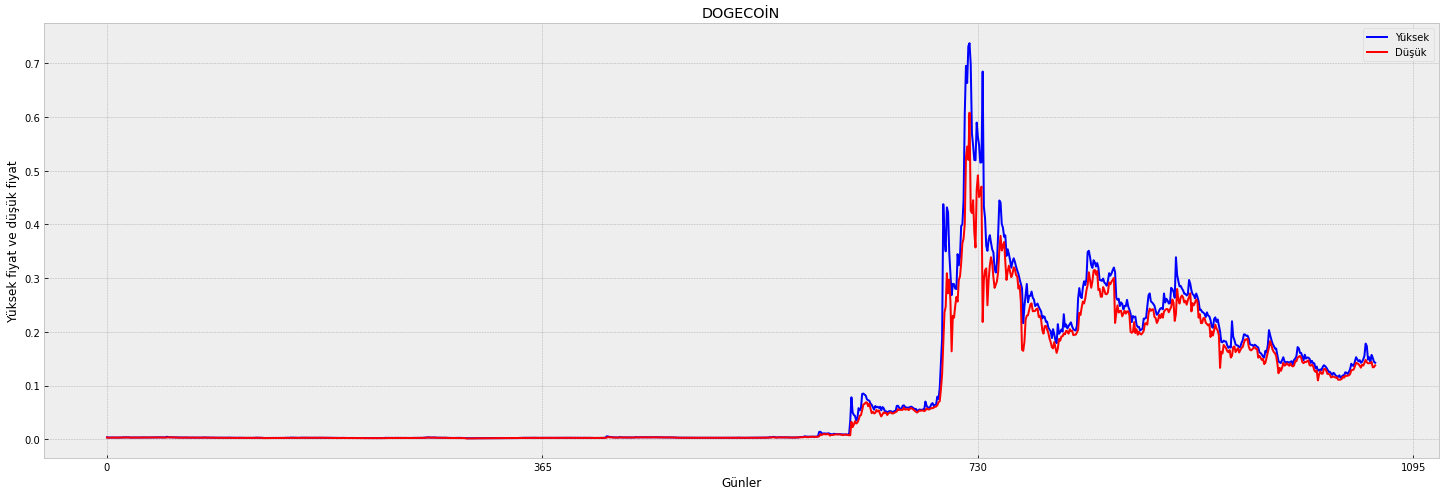

In [ ]:
plt.figure(figsize = (25,8))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Yüksek fiyat ve düşük fiyat")
plt.xticks([365*x for x in range(0,20)])
plt.plot(df["High"],color="blue")
plt.plot(df["Low"],color="red")
plt.legend(["Yüksek", "Düşük"])
plt.show()

Dogenin son 3 yıldaki kapanış fiyatı:

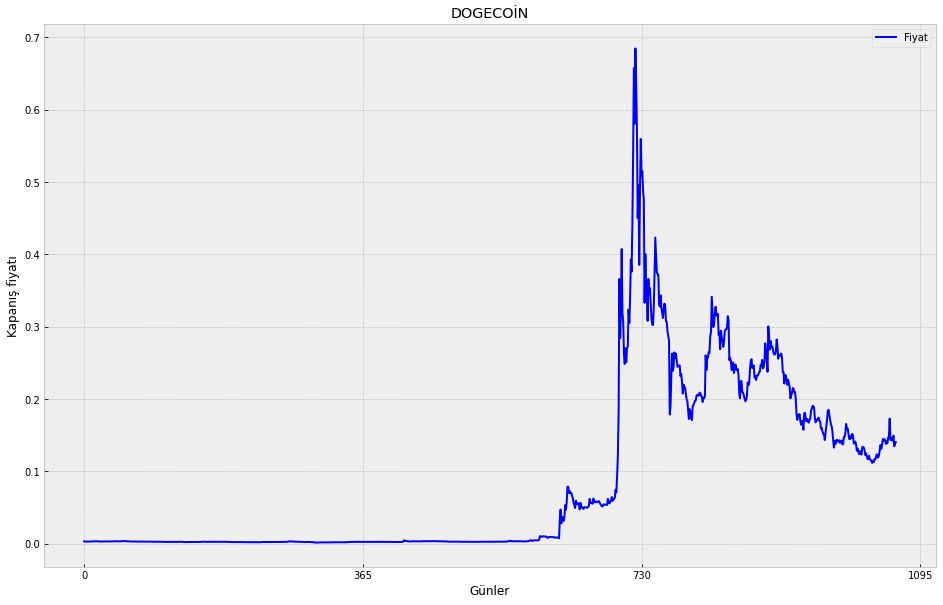

In [ ]:
plt.figure(figsize = (16,10))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Kapanış fiyatı")
plt.xticks([365*x for x in range(0,20)])
plt.plot(df["Close"],color='blue')
plt.legend(["Fiyat"])
plt.show()

3 yıl önce dogenin ilk 10 günkü fiyatları:

In [ ]:
df = df[["Close"]]
df.head(10)

,Close
0,0.003168
1,0.002962
2,0.003005
3,0.003178
4,0.003041
5,0.003086
6,0.002939
7,0.002961
8,0.002995
9,0.002991


30 gün sonrası için tahmin yapacağız

In [ ]:
future_days = 30

datasetimize 30 gün ekliyoruz

In [ ]:
df["Tahmin"] = df["Close"].shift(-future_days)
df.head(35)

,Close,Tahmin
0,0.003168,0.003157
1,0.002962,0.003186
2,0.003005,0.003190
3,0.003178,0.003125
4,0.003041,0.003130
5,0.003086,0.003161
6,0.002939,0.003223
7,0.002961,0.003279
8,0.002995,0.003304
9,0.002991,0.003368


Last 35 items are showen below. The last 30 blank items show that the shifting was applied successfully.

In [ ]:
df.tail(35)

,Close,Tahmin
1029,0.116885,0.144303
1030,0.115602,0.149535
1031,0.115136,0.134654
1032,0.111608,0.138076
1033,0.114048,0.140426
1034,0.112784,NaN
1035,0.116908,NaN
1036,0.116502,NaN
1037,0.119306,NaN
1038,0.123569,NaN


x=kapanış fiyatı son 30 gün hariç

In [ ]:
X = np.array(df.drop(["Tahmin"],1))[:-future_days]
print(X)

[[0.003168]
 [0.002962]
 [0.003005]
 ...
 [0.115136]
 [0.111608]
 [0.114048]]


y=tahmin son 30 gün hariç

In [ ]:
y = np.array(df["Tahmin"])[:-future_days]
print(y)

[0.003157 0.003186 0.00319  ... 0.134654 0.138076 0.140426]


Dividing the dataset into training and test sets. %80 training set and %20 test set.

%80 train %20 test olarak ayıralım:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape --> {X_train.shape}')
print(f'X_test shape --> {X_test.shape}')
print(f'y_train shape --> {y_train.shape}')
print(f'y_test shape --> {y_test.shape}')

X_train shape --> (827, 1)
X_test shape --> (207, 1)
y_train shape --> (827,)
y_test shape --> (207,)


x_future=gelecek 30 gün için tahmin

In [ ]:
x_future = df.drop(["Tahmin"],1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[0.112784],
       [0.116908],
       [0.116502],
       [0.119306],
       [0.123569],
       [0.119154],
       [0.119339],
       [0.122481],
       [0.129727],
       [0.13655 ],
       [0.131013],
       [0.135868],
       [0.144732],
       [0.142657],
       [0.14447 ],
       [0.14321 ],
       [0.137826],
       [0.141315],
       [0.138913],
       [0.146453],
       [0.148591],
       [0.172907],
       [0.143417],
       [0.146102],
       [0.142549],
       [0.144303],
       [0.149535],
       [0.134654],
       [0.138076],
       [0.140426]])

RandomForestRegressor kullanacağız modeli oluşturp eğitelim.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=200)
randomForest.fit(X_train,y_train)
accuracy = randomForest.score(X_test,y_test)
print("Accuracy : ", accuracy)

Accuracy :  0.8246086261172781


son 30 gün tahmin edildi...

In [ ]:
randomForest_prediction = randomForest.predict(x_future)
print(randomForest_prediction)

[0.13834625 0.14742331 0.14531567 0.19269034 0.14116833 0.18028528
 0.25922697 0.15823073 0.13594296 0.122689   0.13641857 0.12398377
 0.11420474 0.13463809 0.11607176 0.14854999 0.12261319 0.12921486
 0.12165234 0.11710229 0.11625917 0.15298524 0.14767303 0.11618205
 0.1314011  0.11800788 0.12237926 0.13861213 0.1227096  0.129571  ]


değerlerimizi oluşturduğumuz sütüna ekleyelim.

In [ ]:
predictions = randomForest_prediction

valid = df[X.shape[0]:]
valid

,Close,Tahmin
1034,0.112784,NaN
1035,0.116908,NaN
1036,0.116502,NaN
1037,0.119306,NaN
1038,0.123569,NaN
1039,0.119154,NaN
1040,0.119339,NaN
1041,0.122481,NaN
1042,0.129727,NaN
1043,0.136550,NaN


In [ ]:
valid["Tahmin"] = predictions
valid

,Close,Tahmin
1034,0.112784,0.138346
1035,0.116908,0.147423
1036,0.116502,0.145316
1037,0.119306,0.192690
1038,0.123569,0.141168
1039,0.119154,0.180285
1040,0.119339,0.259227
1041,0.122481,0.158231
1042,0.129727,0.135943
1043,0.136550,0.122689


In [ ]:
valuesOfClose = np.array(df["Close"])
valuesOfPrediction = np.array(valid["Tahmin"])
combinated_array = np.append(valuesOfClose,valuesOfPrediction)
combinated_array

array([0.003168  , 0.002962  , 0.003005  , ..., 0.13861213, 0.1227096 ,
       0.129571  ])

In [ ]:
extended = pd.DataFrame(columns=["30ekle"])
extended["30ekle"] = combinated_array
extended

,30ekle
0,0.003168
1,0.002962
2,0.003005
3,0.003178
4,0.003041
...,...
1089,0.118008
1090,0.122379
1091,0.138612
1092,0.122710


Son 30 günün değerlerini grafikte görelim..

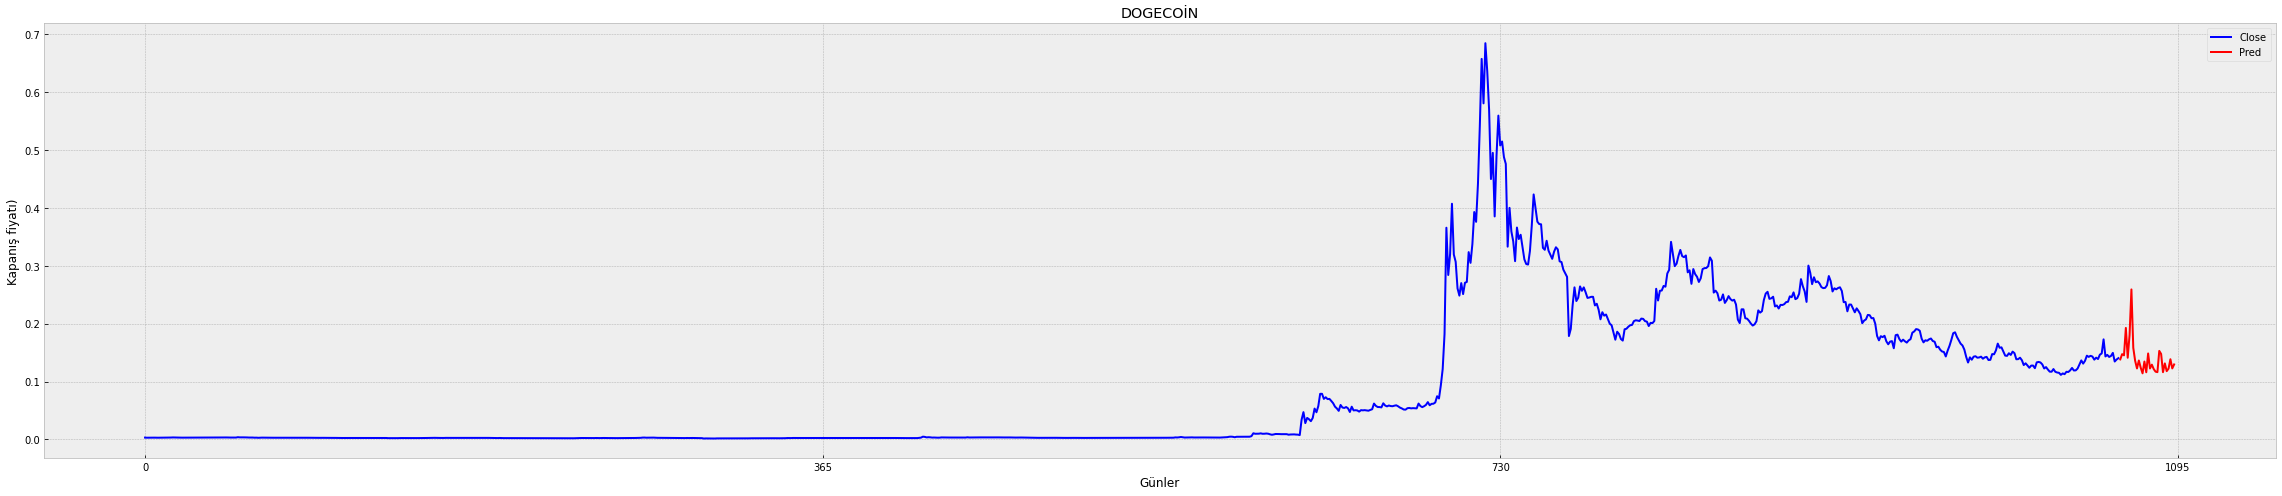

In [ ]:
plt.figure(figsize = (40,8))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Kapanış fiyatı)")
plt.xticks([365*x for x in range(0,1827)])
plt.plot(df["Close"],color="blue")
plt.plot(extended["30ekle"].tail(30),color="red")
plt.legend(["Close","Pred"])
plt.show()

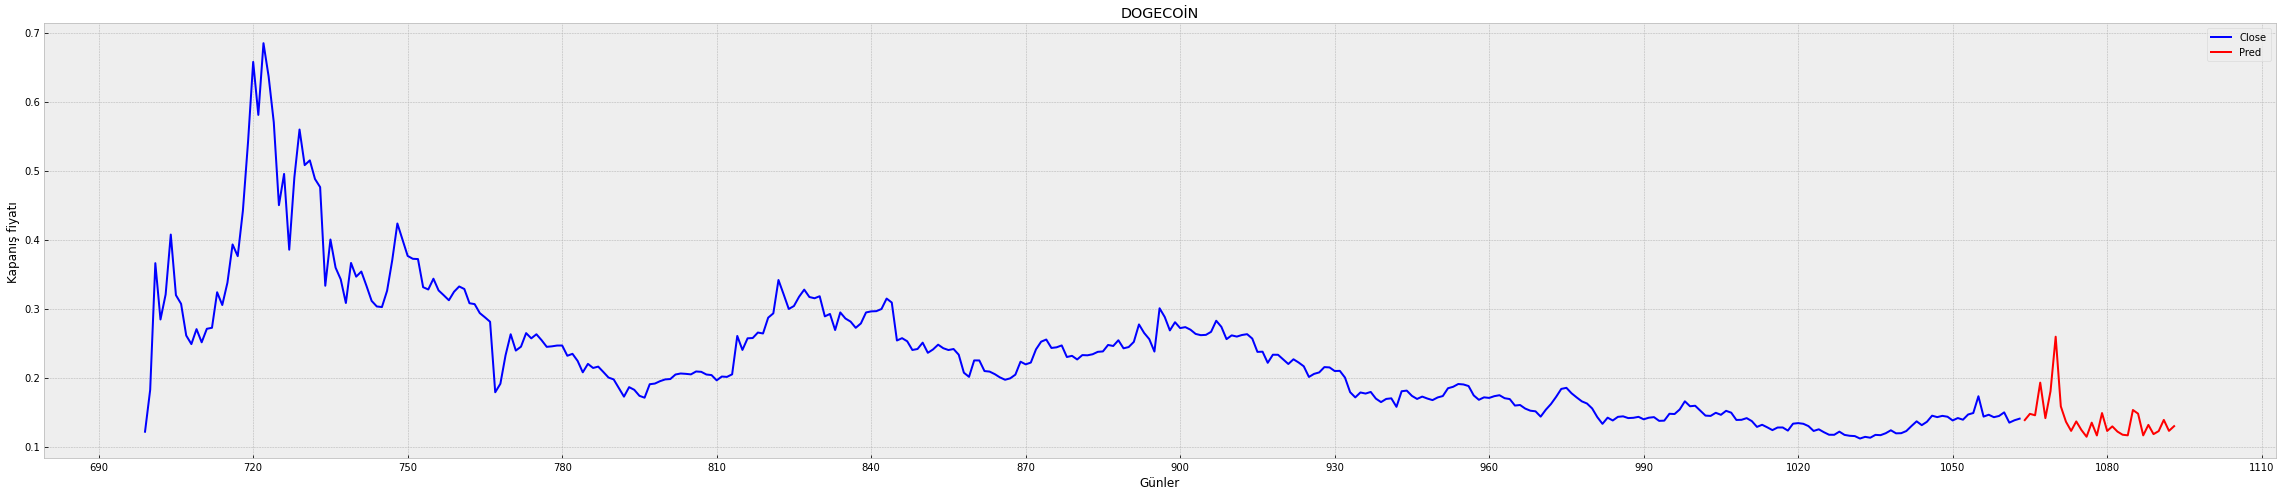

In [ ]:
plt.figure(figsize = (40,8))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Kapanış fiyatı")
plt.xticks([30*x for x in range(0,1860)])
plt.plot(df["Close"].tail(365),color="blue")
plt.plot(extended["30ekle"].tail(30),color="red")
plt.legend(["Close","Pred"])
plt.show()